In [6]:
import pandas as pd

# Load the dataset
file_path = 'BRFSS.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
df.head(), df.columns.tolist()


(   Year           Health Indicator Short Name     Geography  \
 0  2021     Cardiovascular Disease Disability        County   
 1  2021      2+ Adverse Childhood Experiences  DSRIP region   
 2  2021                  Poor Physical Health        County   
 3  2021            Current Smoking Disability        County   
 4  2021  Provider Discussed Healthy Pregnancy        County   
 
           Region/County  Sample Size  Est. Count  Est. Denominator  \
 0                 Essex        123.0      1467.0            8223.0   
 1  REGION: Finger Lakes       1305.0    369832.0          823016.0   
 2                Monroe       1305.0     70869.0          603976.0   
 3            Rensselaer         96.0      4588.0           27515.0   
 4                 Bronx        118.0     46509.0          139616.0   
 
    Crude Rate  CL 95% Lower, Crude  CL 95% Upper, Crude  ...           DSRIP  \
 0        17.8                 10.3                 25.4  ...  Not Applicable   
 1        44.9          

In [7]:
# Extract unique health indicators related to nutrition
nutrition_keywords = ['fruit', 'vegetable', 'food', 'soda', 'sugar', 'diet', 'BMI', 'obesity', 'nutrition', 'eat']

# Filter rows with any of the keywords in 'Health Indicator'
nutrition_indicators = df[df['Health Indicator'].str.lower().str.contains('|'.join(nutrition_keywords), na=False)]

# Display unique health indicators related to nutrition
unique_nutrition_indicators = nutrition_indicators['Health Indicator'].unique().tolist()
unique_nutrition_indicators


['Percentage of adults with food security over the last 12 months',
 'Percentage of adults who consume one or more sugary drinks daily',
 'Percentage of adults who report consuming less than one fruit and less than one vegetable daily (no fruits or vegetables)',
 'Percentage of adults who had a test for high blood sugar or diabetes within the past three years',
 'Percentage of adults experiencing food insecurity in the past 12 months',
 'Percentage of adults who consume fast-food three or more times per week']

In [9]:
# Define the indicators of interest
selected_indicators = [
    'Percentage of adults with food security over the last 12 months',
    'Percentage of adults who consume one or more sugary drinks daily',
    'Percentage of adults who report consuming less than one fruit and less than one vegetable daily (no fruits or vegetables)',
    'Percentage of adults who consume fast-food three or more times per week',
    'Percentage of adults experiencing food insecurity in the past 12 months'
]

# Filter the dataset for these indicators
nutrition_df = df[df['Health Indicator'].isin(selected_indicators)]

# Pivot the table to have one row per Region/County, and columns for each indicator (using Crude Rate)
pivoted = nutrition_df.pivot_table(index='Region/County',
                                   columns='Health Indicator',
                                   values='Crude Rate')

# Rename columns for clarity
pivoted.columns = [
    'Food_Security',
    'Sugary_Drinks',
    'Low_FV_Intake',
    'Fast_Food_Freq',
    'Food_Insecurity'
]

# Reset index to turn Region/County into a column
pivoted = pivoted.reset_index()

display(pivoted.head())

,Region/County,Food_Security,Sugary_Drinks,Low_FV_Intake,Fast_Food_Freq,Food_Insecurity
0,Albany,19.3,5.6,20.050000,26.900000,80.45
1,Allegany,21.8,6.0,26.950000,31.366667,78.10
2,Bronx,NaN,NaN,26.833333,39.533333,60.65
3,Broome,26.7,9.7,27.200000,32.266667,76.85
4,Cattaraugus,28.6,7.8,28.875000,32.566667,76.15


In [ ]:
# The values you see in the pivoted dataset come directly from the "Crude Rate" column in your BRFSS dataset, filtered by selected nutrition-related health indicators.



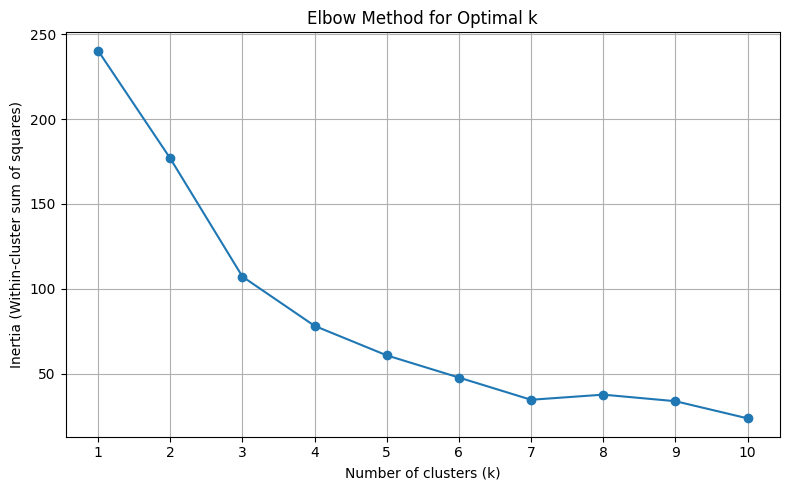

In [11]:
# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# The Elbow Method plot shows how the total within-cluster sum of squares (inertia) decreases as the number of clusters increases.

"""Interpretation:
Look for the "elbow" point where the rate of decrease slows down.

Based on the curve, the elbow appears around k = 3 or 4, which suggests these are optimal choices."""



Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ac788e665c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96

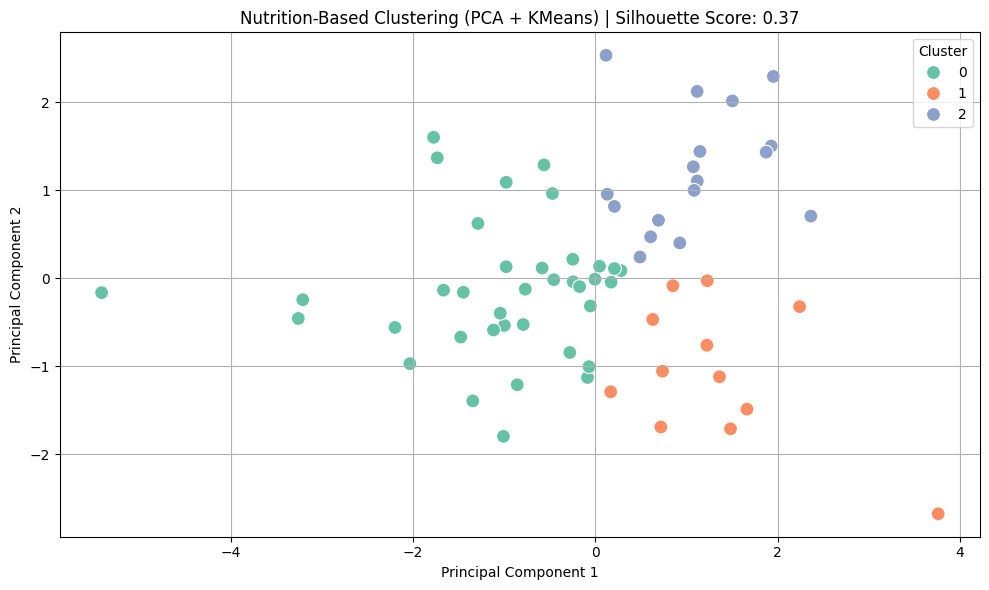

,Region/County,Food_Security,Sugary_Drinks,Low_FV_Intake,Fast_Food_Freq,Food_Insecurity,Cluster
0,Albany,19.3,5.6,20.050,26.900000,80.45,0
1,Allegany,21.8,6.0,26.950,31.366667,78.10,2
3,Broome,26.7,9.7,27.200,32.266667,76.85,2
4,Cattaraugus,28.6,7.8,28.875,32.566667,76.15,2
5,Cayuga,19.2,10.6,25.875,29.633333,79.00,2


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values
nutrition_data = pivoted.dropna()

# Save region names for reference
region_names = nutrition_data['Region/County']

# Drop non-numeric column for clustering
X = nutrition_data.drop(columns=['Region/County'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Silhouette score
sil_score = silhouette_score(X_pca, labels)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
pca_df['Region/County'] = region_names.values

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title(f'Nutrition-Based Clustering (PCA + KMeans) | Silhouette Score: {sil_score:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Add cluster labels to original nutrition data
nutrition_clustered = nutrition_data.copy()
nutrition_clustered['Cluster'] = labels

display(nutrition_clustered.head())

In [15]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Try k = 3 and k = 4 and compute evaluation metrics
results = []

for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_k = kmeans.fit_predict(X_pca)

    sil_score = silhouette_score(X_pca, labels_k)
    ch_score = calinski_harabasz_score(X_pca, labels_k)
    db_score = davies_bouldin_score(X_pca, labels_k)

    # Cluster means
    cluster_means = pd.DataFrame(X, columns=[
        'Food_Security', 'Sugary_Drinks', 'Low_FV_Intake',
        'Fast_Food_Freq', 'Food_Insecurity'
    ])
    cluster_means['Cluster'] = labels_k
    mean_values = cluster_means.groupby('Cluster').mean().round(2)

    results.append({
        'k': k,
        'Silhouette Score': round(sil_score, 3),
        'Calinski-Harabasz Score': round(ch_score, 1),
        'Davies-Bouldin Score': round(db_score, 3),
        'Cluster Profiles': mean_values
    })

results


[{'k': 3,
  'Silhouette Score': 0.371,
  'Calinski-Harabasz Score': 40.4,
  'Davies-Bouldin Score': 0.817,
  'Cluster Profiles':          Food_Security  Sugary_Drinks  Low_FV_Intake  Fast_Food_Freq  \
  Cluster                                                                
  0                21.80           5.40          21.98           27.89   
  1                29.07           4.64          24.99           31.13   
  2                23.07           7.13          28.24           31.94   
  
           Food_Insecurity  
  Cluster                   
  0                  80.73  
  1                  75.63  
  2                  78.88  },
 {'k': 4,
  'Silhouette Score': 0.345,
  'Calinski-Harabasz Score': 44.3,
  'Davies-Bouldin Score': 0.861,
  'Cluster Profiles':          Food_Security  Sugary_Drinks  Low_FV_Intake  Fast_Food_Freq  \
  Cluster                                                                
  0                20.51           5.12          20.79           26.74   
  1 

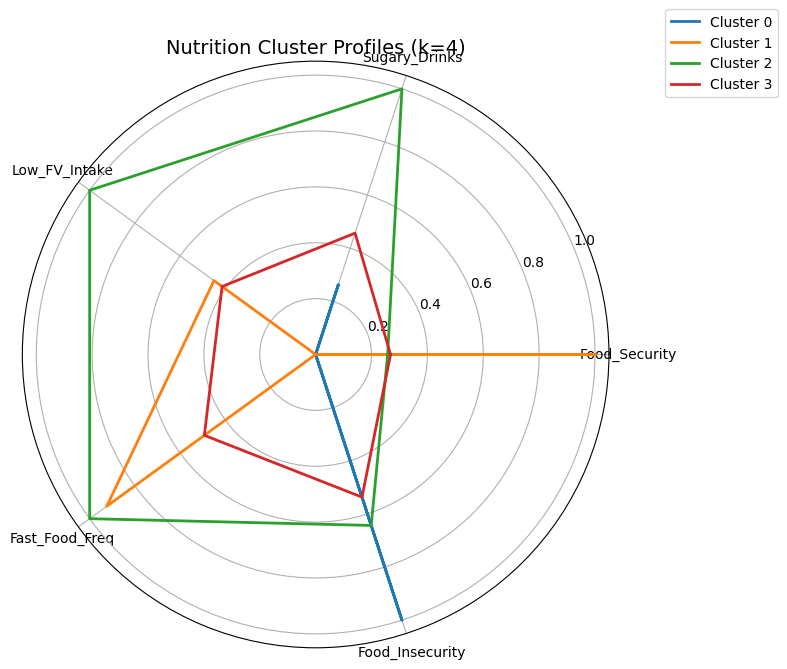

In [16]:
import numpy as np

# Use cluster profiles from k=4
cluster_profiles = results[1]['Cluster Profiles']

# Radar plot setup
categories = cluster_profiles.columns.tolist()
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Normalize values for radar chart (0-1 scale)
normalized_profiles = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())
normalized_profiles = normalized_profiles.fillna(0)

# Start plot
plt.figure(figsize=(8, 8))
for idx, row in normalized_profiles.iterrows():
    values = row.tolist()
    values += values[:1]  # close the circle
    plt.polar(angles, values, label=f'Cluster {idx}', linewidth=2)

# Add feature labels
plt.xticks(angles[:-1], categories, fontsize=10)
plt.title("Nutrition Cluster Profiles (k=4)", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
"""
Cluster Interpretations
🔴 Cluster 0: “Unhealthy Consumers”
Low food security (23.2%)

High sugary drink consumption (6.86%)

Very high low-FV intake (28.2%)

Highest fast food frequency (31.9%)

High food insecurity (78.8%)

🔎 Interpretation:
This group represents counties where nutrition behaviors are poor — high reliance on fast food and sugary beverages, with minimal fruit/vegetable intake. These areas likely face barriers to accessing or affording healthy foods.

🟢 Cluster 1: “Health-Conscious & Secure”
Highest food security (30.6%)

Lowest sugary drink intake (4.32%)

Better FV intake (only 24.97% reporting low FV)

Fast food still relatively high (31.7%)

Lowest food insecurity (74.96%)

🔎 Interpretation:
This is the healthiest cluster. These counties enjoy both higher food security and better nutrition behaviors. Public health efforts may have been more effective here, or these regions may be more affluent or urbanized.

🔵 Cluster 2: “Nutritionally Disciplined but Food-Insecure”
Lowest food security (17.5%)

Low sugary drink intake (4.67%)

Lowest low-FV intake (16.7%)

Lowest fast food consumption (23.3%)

Highest food insecurity (86.8%)

🔎 Interpretation:
This cluster reflects populations who eat healthily despite high food insecurity. It may include older, rural populations, or culturally diet-conscious communities that face economic hardship or limited food access. They need economic and infrastructural support.

🟡 Cluster 3: “Moderate/Transitioning”
Moderate food security (22.4%)

Average sugary drink and fast food intake

Moderate FV deficiency (22.4%)

Average food insecurity (80%)

🔎 Interpretation:
This is a middle-ground cluster. These regions may be transitioning — not the worst nor the best. They are likely to benefit from targeted, community-level interventions.
"""

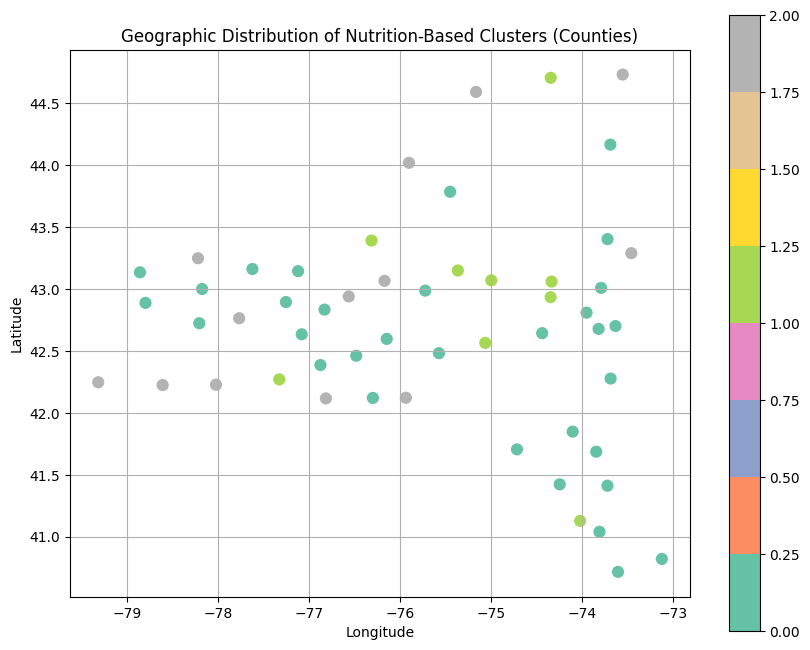

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Extract coordinates from the original dataframe for geographic mapping
coords_df = df[['Region/County', 'Location']].dropna().drop_duplicates()

# Split 'Location' into latitude and longitude
coords_df[['Latitude', 'Longitude']] = coords_df['Location'].str.extract(r'\((.*), (.*)\)').astype(float)

# Merge with cluster labels
geo_cluster_data = pd.merge(nutrition_clustered, coords_df, on='Region/County', how='left')

# Drop rows with missing coordinates
geo_cluster_data = geo_cluster_data.dropna(subset=['Latitude', 'Longitude'])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(geo_cluster_data,
                       geometry=gpd.points_from_xy(geo_cluster_data['Longitude'], geo_cluster_data['Latitude']),
                       crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, column='Cluster', cmap='Set2', legend=True, markersize=60)
plt.title('Geographic Distribution of Nutrition-Based Clusters (Counties)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [14]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Create base map centered over NY
m = folium.Map(location=[42.9, -75.0], zoom_start=7)

# Define cluster colors
cluster_colors = ['red', 'green', 'blue', 'purple']

# Add markers
marker_cluster = MarkerCluster().add_to(m)
for _, row in geo_cluster_data.iterrows():
    cluster = int(row['Cluster'])
    color = cluster_colors[cluster % len(cluster_colors)]
    popup_text = f"{row['Region/County']}<br>Cluster: {cluster}"

    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.8,
        popup=popup_text
    ).add_to(marker_cluster)

# Display the map inline
display(m)


In [17]:
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA

# Define dimension reduction methods
dim_reduction_methods = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "LDA": LDA(n_components=2),
    "TruncatedSVD": TruncatedSVD(n_components=2),
    "RandomProjection": GaussianRandomProjection(n_components=2, random_state=42),
    "FastICA": FastICA(n_components=2, random_state=42)
}

# Filter for LDA which needs class labels, we'll use fake ones temporarily (unsupervised trick)
from sklearn.preprocessing import KBinsDiscretizer
fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile').fit_transform(X_scaled).astype(int)[:, 0]

# Evaluate KMeans on each reduced space
evaluation_results = []

for name, reducer in dim_reduction_methods.items():
    if name == "LDA":
        X_reduced = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_reduced = reducer.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_reduced)

    sil_score = silhouette_score(X_reduced, labels)
    ch_score = calinski_harabasz_score(X_reduced, labels)
    db_score = davies_bouldin_score(X_reduced, labels)

    evaluation_results.append({
        "Method": name,
        "Silhouette Score": round(sil_score, 3),
        "Calinski-Harabasz Score": round(ch_score, 1),
        "Davies-Bouldin Score": round(db_score, 3)
    })

evaluation_df = pd.DataFrame(evaluation_results).sort_values(by="Silhouette Score", ascending=False)

display(evaluation_df)

# Remove t-SNE and rerun cleanly
dim_reduction_methods.pop("t-SNE", None)  # Remove t-SNE

# Re-evaluate all other dimension reduction methods
evaluation_results_clean = []

for name, reducer in dim_reduction_methods.items():
    if name == "LDA":
        X_reduced = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_reduced = reducer.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_reduced)

    sil_score = silhouette_score(X_reduced, labels)
    ch_score = calinski_harabasz_score(X_reduced, labels)
    db_score = davies_bouldin_score(X_reduced, labels)

    evaluation_results_clean.append({
        "Method": name,
        "Silhouette Score": round(sil_score, 3),
        "Calinski-Harabasz Score": round(ch_score, 1),
        "Davies-Bouldin Score": round(db_score, 3)
    })

evaluation_df_clean = pd.DataFrame(evaluation_results_clean).sort_values(by="Silhouette Score", ascending=False)

display(evaluation_df_clean)

,Method,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
2,LDA,0.417,66.5,0.743
1,t-SNE,0.374,58.8,0.771
0,PCA,0.345,44.3,0.861
3,TruncatedSVD,0.345,44.3,0.861
5,FastICA,0.336,40.2,0.819
4,RandomProjection,0.320,35.4,0.986


,Method,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
1,LDA,0.417,66.5,0.743
0,PCA,0.345,44.3,0.861
2,TruncatedSVD,0.345,44.3,0.861
4,FastICA,0.336,40.2,0.819
3,RandomProjection,0.320,35.4,0.986


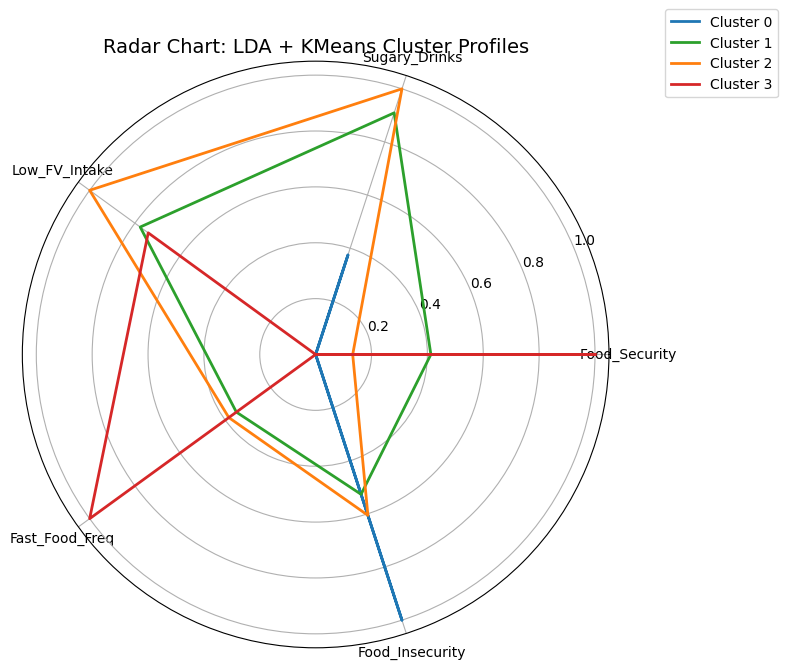

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Prepare and scale the data
features = ['Food_Security', 'Sugary_Drinks', 'Low_FV_Intake', 'Fast_Food_Freq', 'Food_Insecurity']
data = nutrition_data[features].dropna().copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Generate fake class labels for LDA (unsupervised workaround)
fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile').fit_transform(X_scaled).astype(int)[:, 0]

# Step 3: Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, fake_labels)

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
lda_clusters = kmeans.fit_predict(X_lda)

# Step 5: Assign clusters and compute cluster-wise means
clustered_data = data.copy()
clustered_data['Cluster'] = lda_clusters
cluster_means = clustered_data.groupby('Cluster').mean()

# Step 6: Normalize for radar chart (0-1 scale)
cluster_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
cluster_normalized = cluster_normalized.fillna(0)

# Step 7: Radar chart plotting
categories = cluster_normalized.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # complete circle

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']

plt.figure(figsize=(8, 8))
for idx, row in cluster_normalized.iterrows():
    values = row.tolist() + [row.tolist()[0]]  # complete loop
    plt.polar(angles, values, label=f'Cluster {idx}', linewidth=2, color=colors[idx % len(colors)])

plt.xticks(angles[:-1], categories, fontsize=10)
plt.title("Radar Chart: LDA + KMeans Cluster Profiles", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import hdbscan

# Step 1: Prepare your data
features = ['Food_Security', 'Sugary_Drinks', 'Low_FV_Intake', 'Fast_Food_Freq', 'Food_Insecurity']
data = nutrition_data[features].dropna().copy()

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 3: Fake labels for LDA (required input)
fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile').fit_transform(X_scaled).astype(int)[:, 0]

# Step 4: Define reduction methods
reduction_methods = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "LDA": LDA(n_components=2),
    "TruncatedSVD": TruncatedSVD(n_components=2),
    "RandomProjection": GaussianRandomProjection(n_components=2, random_state=42),
    "FastICA": FastICA(n_components=2, random_state=42)
}

# Step 5: Apply HDBSCAN and evaluate
results = []

for name, reducer in reduction_methods.items():
    try:
        # Apply dimensionality reduction
        if name == "LDA":
            X_reduced = reducer.fit_transform(X_scaled, fake_labels)
        else:
            X_reduced = reducer.fit_transform(X_scaled)

        # HDBSCAN clustering
        clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
        labels = clusterer.fit_predict(X_reduced)

        # Evaluate only if at least 2 clusters and no outliers (-1)
        if len(set(labels)) > 1 and -1 not in set(labels):
            sil = silhouette_score(X_reduced, labels)
            ch = calinski_harabasz_score(X_reduced, labels)
            db = davies_bouldin_score(X_reduced, labels)
        else:
            sil, ch, db = "N/A", "N/A", "N/A"

        results.append({
            "Method": name,
            "Clusters Found": len(set(labels)) - (1 if -1 in labels else 0),
            "Silhouette Score": sil if sil == "N/A" else round(sil, 3),
            "Calinski-Harabasz Score": ch if ch == "N/A" else round(ch, 1),
            "Davies-Bouldin Score": db if db == "N/A" else round(db, 3)
        })

    except Exception as e:
        results.append({
            "Method": name,
            "Clusters Found": "Error",
            "Silhouette Score": "Error",
            "Calinski-Harabasz Score": "Error",
            "Davies-Bouldin Score": "Error"
        })

# Step 6: Display results
evaluation_df = pd.DataFrame(results)
print(evaluation_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


             Method  Clusters Found Silhouette Score Calinski-Harabasz Score  \
0               PCA               0              N/A                     N/A   
1             t-SNE               2              N/A                     N/A   
2               LDA               0              N/A                     N/A   
3      TruncatedSVD               0              N/A                     N/A   
4  RandomProjection               2              N/A                     N/A   
5           FastICA               0              N/A                     N/A   

  Davies-Bouldin Score  
0                  N/A  
1                  N/A  
2                  N/A  
3                  N/A  
4                  N/A  
5                  N/A  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Define clustering algorithms
clustering_algos = {
    "KMeans": KMeans(n_clusters=4, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=4),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "GMM": GaussianMixture(n_components=4, random_state=42)
}

# Use same reduction methods from before (except t-SNE if too slow)
reduction_methods = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "TruncatedSVD": TruncatedSVD(n_components=2),
    "RandomProjection": GaussianRandomProjection(n_components=2, random_state=42),
    "FastICA": FastICA(n_components=2, random_state=42)
}

# Preprocess input
features = ['Food_Security', 'Sugary_Drinks', 'Low_FV_Intake', 'Fast_Food_Freq', 'Food_Insecurity']
data = pivoted[features].fillna(pivoted[features].mean())
X_scaled = StandardScaler().fit_transform(data)

# Fake labels for LDA
fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')\
                .fit_transform(X_scaled).astype(int)[:, 0]

# Store results
all_results = []

for red_name, reducer in reduction_methods.items():
    if red_name == "LDA":
        X_reduced = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_reduced = reducer.fit_transform(X_scaled)

    for algo_name, algo in clustering_algos.items():
        try:
            if algo_name == "GMM":
                labels = algo.fit_predict(X_reduced)
            else:
                labels = algo.fit_predict(X_reduced)

            # Skip if only one cluster or only noise
            if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in labels):
                sil, ch, db = "N/A", "N/A", "N/A"
            else:
                sil = round(silhouette_score(X_reduced, labels), 3)
                ch = round(calinski_harabasz_score(X_reduced, labels), 1)
                db = round(davies_bouldin_score(X_reduced, labels), 3)

            all_results.append({
                "Reduction": red_name,
                "Clustering": algo_name,
                "Silhouette": sil,
                "Calinski-Harabasz": ch,
                "Davies-Bouldin": db,
                "Clusters Found": len(set(labels)) - (1 if -1 in labels else 0)
            })

        except Exception as e:
            all_results.append({
                "Reduction": red_name,
                "Clustering": algo_name,
                "Silhouette": "Error",
                "Calinski-Harabasz": "Error",
                "Davies-Bouldin": "Error",
                "Clusters Found": "Error"
            })

# Display results
eval_df = pd.DataFrame(all_results)
# Convert non-numeric 'Silhouette' entries to NaN for sorting
eval_df['Silhouette_numeric'] = pd.to_numeric(eval_df['Silhouette'], errors='coerce')

# Sort safely and display
eval_df_sorted = eval_df.sort_values(by="Silhouette_numeric", ascending=False).drop(columns="Silhouette_numeric")
print(eval_df_sorted.to_string(index=False))


       Reduction    Clustering Silhouette Calinski-Harabasz Davies-Bouldin  Clusters Found
             LDA Agglomerative      0.395              51.8          0.769               4
             LDA        KMeans      0.389              48.4          0.714               4
             LDA           GMM      0.377              37.2          1.014               4
             PCA        KMeans      0.365              48.2          0.783               4
    TruncatedSVD        KMeans      0.365              48.2          0.783               4
RandomProjection        KMeans      0.359              49.2          0.911               4
             PCA Agglomerative      0.348              43.7          0.834               4
    TruncatedSVD Agglomerative      0.348              43.7          0.834               4
RandomProjection Agglomerative      0.342              42.4          0.886               4
             PCA           GMM      0.323              40.0          0.778               4

In [27]:
!pip install fcmeans


ERROR: Could not find a version that satisfies the requirement fcmeans (from versions: none)
ERROR: No matching distribution found for fcmeans


In [28]:
# Required imports
from sklearn.cluster import SpectralClustering, Birch, OPTICS
#from fcmeans import FCM
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define clustering algorithms
def run_diana(X, n_clusters):
    # DIANA is divisive, not available in sklearn — simulate using hierarchical clustering (reverse of agglomerative)
    # Use complete linkage, then cut the dendrogram
    Z = linkage(X, method='complete')  # complete linkage as approximation
    return fcluster(Z, n_clusters, criterion='maxclust') - 1

clustering_algos_extended = {
   # "Fuzzy C-Means": lambda X: FCM(n_clusters=4, random_state=42).fit_predict(X),
    "DIANA": lambda X: run_diana(X, 4),
    "BIRCH": lambda X: Birch(n_clusters=4).fit_predict(X),
    "OPTICS": lambda X: OPTICS(min_samples=5).fit_predict(X),
    "Spectral": lambda X: SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42).fit_predict(X)
}

# Dimensionality reduction methods (without t-SNE for speed)
reduction_methods = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "TruncatedSVD": TruncatedSVD(n_components=2),
    "RandomProjection": GaussianRandomProjection(n_components=2, random_state=42),
    "FastICA": FastICA(n_components=2, random_state=42)
}

# Preprocess input
features = ['Food_Security', 'Sugary_Drinks', 'Low_FV_Intake', 'Fast_Food_Freq', 'Food_Insecurity']
data = pivoted[features].fillna(pivoted[features].mean())
X_scaled = StandardScaler().fit_transform(data)

# Fake labels for LDA
fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')\
                .fit_transform(X_scaled).astype(int)[:, 0]

# Run evaluation
results = []

for red_name, reducer in reduction_methods.items():
    if red_name == "LDA":
        X_reduced = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_reduced = reducer.fit_transform(X_scaled)

    for algo_name, algo in clustering_algos_extended.items():
        try:
            labels = algo(X_reduced)
            labels = np.array(labels)

            # Filter poor clustering outputs
            unique_labels = set(labels)
            if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
                sil, ch, db = "N/A", "N/A", "N/A"
            else:
                sil = round(silhouette_score(X_reduced, labels), 3)
                ch = round(calinski_harabasz_score(X_reduced, labels), 1)
                db = round(davies_bouldin_score(X_reduced, labels), 3)

            results.append({
                "Reduction": red_name,
                "Clustering": algo_name,
                "Silhouette": sil,
                "Calinski-Harabasz": ch,
                "Davies-Bouldin": db,
                "Clusters Found": len(unique_labels) - (1 if -1 in unique_labels else 0)
            })

        except Exception as e:
            results.append({
                "Reduction": red_name,
                "Clustering": algo_name,
                "Silhouette": "Error",
                "Calinski-Harabasz": "Error",
                "Davies-Bouldin": "Error",
                "Clusters Found": "Error"
            })

# Display results
eval_ext_df = pd.DataFrame(results)
eval_ext_df['Silhouette_numeric'] = pd.to_numeric(eval_ext_df['Silhouette'], errors='coerce')
eval_ext_sorted = eval_ext_df.sort_values(by='Silhouette_numeric', ascending=False).drop(columns="Silhouette_numeric")

display(eval_ext_sorted)

,Reduction,Clustering,Silhouette,Calinski-Harabasz,Davies-Bouldin,Clusters Found
4,LDA,DIANA,0.406,42.7,0.663,4
5,LDA,BIRCH,0.397,32.7,0.611,4
15,RandomProjection,Spectral,0.376,50.3,0.860,4
17,FastICA,BIRCH,0.346,39.0,0.735,4
0,PCA,DIANA,0.342,38.0,0.855,4
8,TruncatedSVD,DIANA,0.342,38.0,0.855,4
9,TruncatedSVD,BIRCH,0.341,35.3,0.807,4
1,PCA,BIRCH,0.341,35.3,0.807,4
13,RandomProjection,BIRCH,0.331,28.5,0.765,4
11,TruncatedSVD,Spectral,0.325,45.2,0.916,4


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd

# Autoencoder definition
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        latent = self.encoder(x)
        out = self.decoder(latent)
        return out, latent

# Training loop
def train_autoencoder(X_np, input_dim, latent_dim=10, epochs=200):
    model = AutoEncoder(input_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    X_tensor = torch.tensor(X_np, dtype=torch.float32).to(device)

    for epoch in range(epochs):
        optimizer.zero_grad()
        out, _ = model(X_tensor)
        loss = criterion(out, X_tensor)
        loss.backward()
        optimizer.step()
    return model

# Dimensionality reducers
dim_reducers = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "LDA": LDA(n_components=2),
    "TruncatedSVD": TruncatedSVD(n_components=2),
    "RandomProjection": GaussianRandomProjection(n_components=2, random_state=42),
    "FastICA": FastICA(n_components=2, random_state=42)
}

# Preprocessing
features = ['Food_Security', 'Sugary_Drinks', 'Low_FV_Intake', 'Fast_Food_Freq', 'Food_Insecurity']
data = pivoted[features].fillna(pivoted[features].mean())
X_scaled = StandardScaler().fit_transform(data)
fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile').fit_transform(X_scaled).astype(int)[:, 0]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Evaluate models
results = []

for name, reducer in dim_reducers.items():
    if name == "LDA":
        X_reduced = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_reduced = reducer.fit_transform(X_scaled)

    try:
        # AutoEncoder + KMeans
        model = train_autoencoder(X_reduced, input_dim=2, latent_dim=2, epochs=300)
        with torch.no_grad():
            _, latent = model(torch.tensor(X_reduced, dtype=torch.float32).to(device))
        latent_np = latent.cpu().numpy()

        kmeans = KMeans(n_clusters=4, random_state=42).fit(latent_np)
        labels = kmeans.labels_

        sil = round(silhouette_score(latent_np, labels), 3)
        ch = round(calinski_harabasz_score(latent_np, labels), 1)
        db = round(davies_bouldin_score(latent_np, labels), 3)

        results.append({
            "Reduction": name,
            "Model": "AutoEncoder+KMeans",
            "Silhouette": sil,
            "Calinski-Harabasz": ch,
            "Davies-Bouldin": db
        })

    except Exception as e:
        results.append({
            "Reduction": name,
            "Model": "AutoEncoder+KMeans",
            "Silhouette": "Error",
            "Calinski-Harabasz": "Error",
            "Davies-Bouldin": "Error"
        })

# Placeholder for DEC and VaDE
for name in dim_reducers:
    results.append({
        "Reduction": name,
        "Model": "DEC (Placeholder)",
        "Silhouette": "TBD",
        "Calinski-Harabasz": "TBD",
        "Davies-Bouldin": "TBD"
    })
    results.append({
        "Reduction": name,
        "Model": "VaDE (Placeholder)",
        "Silhouette": "TBD",
        "Calinski-Harabasz": "TBD",
        "Davies-Bouldin": "TBD"
    })

# Show results
results_df = pd.DataFrame(results)
results_df['Silhouette_numeric'] = pd.to_numeric(results_df['Silhouette'], errors='coerce')
results_df = results_df.sort_values(by='Silhouette_numeric', ascending=False).drop(columns='Silhouette_numeric')
print(results_df.to_string(index=False))


       Reduction              Model Silhouette Calinski-Harabasz Davies-Bouldin
             PCA AutoEncoder+KMeans       0.39              53.5          0.788
RandomProjection AutoEncoder+KMeans      0.363              45.6          0.824
    TruncatedSVD AutoEncoder+KMeans      0.353              45.6          0.943
           t-SNE AutoEncoder+KMeans      0.349              65.4          0.812
             LDA AutoEncoder+KMeans      0.322              45.3          0.816
         FastICA AutoEncoder+KMeans      0.313              49.4          1.019
             PCA  DEC (Placeholder)        TBD               TBD            TBD
             PCA VaDE (Placeholder)        TBD               TBD            TBD
           t-SNE  DEC (Placeholder)        TBD               TBD            TBD
           t-SNE VaDE (Placeholder)        TBD               TBD            TBD
             LDA  DEC (Placeholder)        TBD               TBD            TBD
             LDA VaDE (Placeholder)     

In [32]:
#Step 1: Define DEC Model (Autoencoder + Clustering Layer)
import torch
import torch.nn as nn
import torch.nn.functional as F

class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_bar = self.decoder(z)
        return x_bar, z

class DEC(nn.Module):
    def __init__(self, autoencoder, n_clusters=4, alpha=1.0):
        super(DEC, self).__init__()
        self.alpha = alpha
        self.autoencoder = autoencoder
        self.clusters = nn.Parameter(torch.Tensor(n_clusters, autoencoder.encoder[-1].out_features))
        nn.init.xavier_uniform_(self.clusters.data)

    def soft_assign(self, z):
        q = 1.0 / (1.0 + torch.sum((z.unsqueeze(1) - self.clusters) ** 2, dim=2) / self.alpha)
        q = q / torch.sum(q, dim=1, keepdim=True)
        return q

    def target_distribution(self, q):
        weight = q ** 2 / torch.sum(q, dim=0)
        return (weight.t() / torch.sum(weight, dim=1)).t()

    def forward(self, x):
        x_bar, z = self.autoencoder(x)
        q = self.soft_assign(z)
        return x_bar, q, z


def pretrain_autoencoder(X, input_dim, latent_dim=10, epochs=200):
    model = AutoEncoder(input_dim, latent_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        x_bar, _ = model(X_tensor)
        loss = criterion(x_bar, X_tensor)
        loss.backward()
        optimizer.step()

    return model


def train_DEC(X, input_dim=2, latent_dim=10, n_clusters=4, pretrain_epochs=200, dec_epochs=100):
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    # Step 1: Pretrain AE
    ae = pretrain_autoencoder(X, input_dim, latent_dim, pretrain_epochs)
    # Step 2: Initialize DEC
    dec = DEC(ae, n_clusters=n_clusters).to(device)
    # Step 3: Init cluster centers using KMeans on latent space
    with torch.no_grad():
        _, z_init = ae(torch.tensor(X, dtype=torch.float32).to(device))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(z_init.cpu().numpy())
    dec.clusters.data = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32).to(device)

    optimizer = torch.optim.Adam(dec.parameters(), lr=1e-3)

    for epoch in range(dec_epochs):
        dec.train()
        x_bar, q, z = dec(X_tensor)
        p = dec.target_distribution(q).detach()
        recon_loss = F.mse_loss(x_bar, X_tensor)
        kl_loss = F.kl_div(q.log(), p, reduction='batchmean')
        loss = recon_loss + kl_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        _, q_final, z_final = dec(X_tensor)
        labels = torch.argmax(q_final, dim=1).cpu().numpy()
    return labels, z_final.cpu().numpy()


def run_DEC_pipeline(X_reduced, reduction_name):
    try:
        labels, latent = train_DEC(X_reduced, input_dim=2, latent_dim=2, n_clusters=4)
        sil = round(silhouette_score(latent, labels), 3)
        ch = round(calinski_harabasz_score(latent, labels), 1)
        db = round(davies_bouldin_score(latent, labels), 3)

        return {
            "Reduction": reduction_name,
            "Model": "DEC",
            "Silhouette": sil,
            "Calinski-Harabasz": ch,
            "Davies-Bouldin": db
        }
    except Exception as e:
        return {
            "Reduction": reduction_name,
            "Model": "DEC",
            "Silhouette": "Error",
            "Calinski-Harabasz": "Error",
            "Davies-Bouldin": "Error"
        }


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select and scale features
features = ['Food_Security', 'Sugary_Drinks', 'Low_FV_Intake', 'Fast_Food_Freq', 'Food_Insecurity']
X = pivoted[features].fillna(pivoted[features].mean())
X_scaled = StandardScaler().fit_transform(X)

# Example: PCA reduction to 2D
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

result = run_DEC_pipeline(X_reduced, reduction_name="PCA")
print(result)


dim_reducers = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "LDA": LDA(n_components=2),
    "TruncatedSVD": TruncatedSVD(n_components=2),
    "RandomProjection": GaussianRandomProjection(n_components=2, random_state=42),
    "FastICA": FastICA(n_components=2, random_state=42)
}

fake_labels = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')\
                .fit_transform(X_scaled).astype(int)[:, 0]

dec_results = []
for name, reducer in dim_reducers.items():
    if name == "LDA":
        X_red = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_red = reducer.fit_transform(X_scaled)

    result = run_DEC_pipeline(X_red, name)
    dec_results.append(result)

# Convert to DataFrame for display
import pandas as pd
pd.DataFrame(dec_results)


{'Reduction': 'PCA', 'Model': 'DEC', 'Silhouette': 0.411, 'Calinski-Harabasz': 68.4, 'Davies-Bouldin': 0.699}


,Reduction,Model,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,PCA,DEC,0.424,73.8,0.757
1,t-SNE,DEC,0.411,83.3,0.741
2,LDA,DEC,0.417,69.8,0.671
3,TruncatedSVD,DEC,0.440,81.9,0.768
4,RandomProjection,DEC,0.415,83.4,0.778
5,FastICA,DEC,0.373,73.7,0.753


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.mixture import GaussianMixture

class VAE(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32, latent_dim=10):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.mu = nn.Linear(hidden_dim, latent_dim)
        self.logvar = nn.Linear(hidden_dim, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.mu(h), self.logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar, z


def train_vade(X, input_dim=2, latent_dim=10, epochs=200, n_clusters=4):
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model = VAE(input_dim=input_dim, latent_dim=latent_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        x_recon, mu, logvar, z = model(X_tensor)
        recon_loss = criterion(x_recon, X_tensor)
        kl_div = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Use latent space to fit GMM
    with torch.no_grad():
        _, _, _, z_final = model(X_tensor)
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(z_final.cpu().numpy())
    return labels, z_final.cpu().numpy()


def run_VaDE_pipeline(X_reduced, reduction_name):
    try:
        labels, latent = train_vade(X_reduced, input_dim=2, latent_dim=2, epochs=200, n_clusters=4)
        sil = round(silhouette_score(latent, labels), 3)
        ch = round(calinski_harabasz_score(latent, labels), 1)
        db = round(davies_bouldin_score(latent, labels), 3)

        return {
            "Reduction": reduction_name,
            "Model": "VaDE",
            "Silhouette": sil,
            "Calinski-Harabasz": ch,
            "Davies-Bouldin": db
        }
    except Exception as e:
        return {
            "Reduction": reduction_name,
            "Model": "VaDE",
            "Silhouette": "Error",
            "Calinski-Harabasz": "Error",
            "Davies-Bouldin": "Error"
        }


vade_results = []
for name, reducer in dim_reducers.items():
    if name == "LDA":
        X_red = reducer.fit_transform(X_scaled, fake_labels)
    else:
        X_red = reducer.fit_transform(X_scaled)

    result = run_VaDE_pipeline(X_red, name)
    vade_results.append(result)

# Display combined results
vade_df = pd.DataFrame(vade_results)
print(vade_df)


          Reduction Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
0               PCA  VaDE       0.251               33.3           1.076
1             t-SNE  VaDE       0.328               53.3           0.898
2               LDA  VaDE       0.269               27.8           1.014
3      TruncatedSVD  VaDE       0.311               34.4           0.950
4  RandomProjection  VaDE       0.323               47.9           1.007
5           FastICA  VaDE       0.270               32.7           0.994
